In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

In [17]:
file_path = '/workspaces/Feedback_Error_Chatbot/data/predicting_students_errors.csv'

In [18]:
df = pd.read_csv(file_path)

In [19]:
def grade_distribution(df):
    df['grade'] = df['grade'].astype(float)
    plt.figure(figsize=(8, 5))
    sns.histplot(df['grade'], bins=10, kde=True)
    plt.title("Grade Distribution")
    plt.xlabel("Grade")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

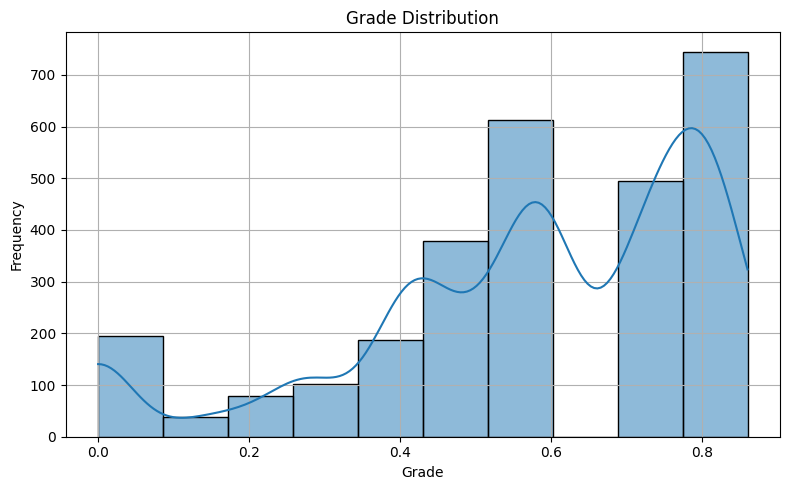

In [20]:
grade_distribution(df)

In [33]:
from neo4j import GraphDatabase
import os
from dotenv import load_dotenv
load_dotenv()


True

In [34]:
driver = GraphDatabase.driver(
    uri = os.getenv("NEO4J_URI"),
    auth=(os.getenv("NEO4J_USERNAME"), os.getenv("NEO4J_PASSWORD"))
)

In [35]:
def reset_db(tx):
    tx.run("MATCH (n) DETACH DELETE n")
    constraints = tx.run("CALL db.constraints() YIELD name RETURN name")
    for record in constraints:
        tx.run(f"DROP CONSTRAINT {record['name']}")
    indexes = tx.run("CALL db.indexes() YIELD name RETURN name")
    for record in indexes:
        tx.run(f"DROP INDEX {record['name']}")

with driver.session() as session:
    session.execute_write(reset_db)

driver.close()


ClientError: {code: Neo.ClientError.Procedure.ProcedureNotFound} {message: There is no procedure with the name `db.constraints` registered for this database instance. Please ensure you've spelled the procedure name correctly and that the procedure is properly deployed.}